In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout

In [3]:
# Given 90 features. Naming them as t1, t2, ...
T_features = ['year', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 't31', 't32', 't33', 't34', 't35', 't36 ', 't37', 't38', 't39', 't40', 't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 't51', 't52', 't53' , 't54', 't55', 't56', 't57', 't58', 't59', 't60', 't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70', 't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80', 't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90']

In [4]:
# Loading the million song dataset
song_data = pd.read_csv("/content/sample_data/YearPredictionMSD.txt", names=T_features)

In [5]:
# Looking at a few records of the data
song_data.iloc[50:60, 0:11]

,year,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
50,2003,48.74021,58.47058,6.31415,-4.83502,-20.12980,-10.66583,-3.79006,-5.86413,-12.05891,-6.12167
51,2001,47.07198,11.08431,2.40665,-3.59094,-7.34207,-23.30182,-4.69296,-9.66001,-1.17057,-1.97378
52,2003,46.57028,40.21313,26.57595,-6.26195,4.39768,-11.51428,10.49994,-0.84929,6.39492,-1.54861
53,2001,50.38848,33.10541,-9.96038,-16.36960,3.72800,-27.46891,-10.35206,-7.59486,6.28963,3.99158
54,2003,46.90560,-14.39794,13.99280,1.34363,-16.92556,-13.65773,0.17184,-15.54375,8.09908,-3.35865
55,2003,48.17885,41.24859,0.54511,4.56058,-5.99131,-17.37135,12.71668,2.77777,10.86294,8.14324
56,2003,48.12588,10.30049,-0.28290,-3.53812,8.23451,-15.89021,-0.31856,-3.08992,0.58811,-2.70819
57,2003,44.22182,31.24939,12.98686,4.18576,-8.55989,-20.89608,23.92051,-0.90318,-0.27313,-0.74136
58,2003,41.80813,-0.46708,-34.72247,1.79426,-15.91473,0.58501,1.75419,-8.46113,8.44353,-2.99996
59,2003,44.20112,24.37638,-16.52952,-6.18728,0.32469,-26.69728,11.79268,0.93033,-2.40651,-2.84050


In [6]:
# Shape of the dataframe
song_data.shape

(515345, 91)

In [7]:
# Changing default display setting to view all rows for checking null values in the data.
pd.set_option('display.max_rows',None)

In [73]:
# Finding null values
res = song_data.isnull().any()
count = 0
for i in res:
  if i == True:
    count += 1
print("Number of columns with null values: ", count)

Number of columns with null values:  0


In [9]:
# Getting number of songs per year to understand the song year distribution
numberofsongs = {}
df = pd.DataFrame(columns=['Year', 'numberofsongs'])
for y in range(1922,2012):
    numberofsongs[y] = len(song_data[song_data.year==y])
    df.loc[len(df)] = [y, numberofsongs[y] ]
print(df)

    Year numberofsongs
0   1922             6
1   1923             0
2   1924             5
3   1925             7
4   1926            19
5   1927            42
6   1928            52
7   1929            93
8   1930            40
9   1931            35
10  1932            11
11  1933             6
12  1934            29
13  1935            24
14  1936            25
15  1937            28
16  1938            19
17  1939            35
18  1940            52
19  1941            32
20  1942            24
21  1943            14
22  1944            15
23  1945            30
24  1946            29
25  1947            57
26  1948            43
27  1949            60
28  1950            83
29  1951            74
30  1952            77
31  1953           133
32  1954           123
33  1955           275
34  1956           565
35  1957           597
36  1958           583
37  1959           592
38  1960           424
39  1961           571
40  1962           605
41  1963           902
42  1964   

Text(0, 0.5, 'Number of songs')

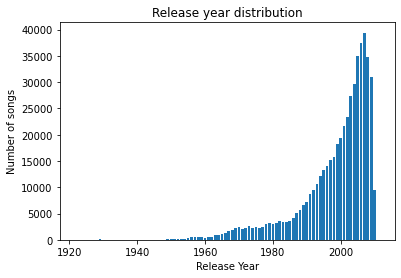

In [10]:
# Getting the class distrubution of the classes(release years)
plt.title("Release year distribution")
years = range(1922,2012)
v = [numberofsongs[y] for y in years]
plt.bar(years, v, align='center')
plt.xlabel("Release Year")
plt.ylabel("Number of songs")

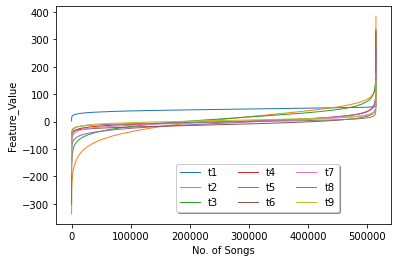

In [11]:
# plotting 10 features and checking how the sorted values are distributed across the songs
for t in T_features[1:10]:
    y_values = song_data[t]
    plt.plot(sorted(y_values), label=t, linewidth=1)
plt.xlabel("No. of Songs")
plt.ylabel("Feature_Value")
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 0.3), ncol=3, fancybox=True, shadow=True)

In [12]:
# Extracting the X(input features) and y(output) data frames
X = song_data.iloc[:,1:]  # X contains 90 columns
Y = song_data.iloc[:,0]  # Y contains year column

In [13]:
# Getting description of the data to get an understanding of the values
X.describe()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,1.882385,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,6.530232,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,-41.631660,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,-2.444850,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,1.783520,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,6.147220,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,60.345350,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [14]:
# The scale of the feature values are varying. Hence normalizing the features using min max scaling

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_df = pd.DataFrame(X_scaled,columns=X.columns)

In [15]:
X_df.describe()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,0.691420,0.469220,0.496370,0.317065,0.395025,0.291384,0.515292,0.354893,0.477338,0.426704,...,0.354641,0.487939,0.368868,0.649008,0.567965,0.466491,0.600212,0.343834,0.503537,0.361319
std,0.100755,0.071524,0.056533,0.033315,0.051486,0.051839,0.040408,0.039970,0.038797,0.064036,...,0.025103,0.019795,0.024342,0.019669,0.026832,0.016751,0.024320,0.019081,0.012494,0.020852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.634423,0.431296,0.464117,0.297366,0.363241,0.255425,0.492028,0.331428,0.455263,0.384271,...,0.340902,0.480489,0.356416,0.640192,0.556182,0.459281,0.589698,0.333791,0.498181,0.351738
50%,0.705890,0.479105,0.499284,0.313357,0.396254,0.284665,0.516247,0.355178,0.477685,0.425735,...,0.349492,0.490235,0.366329,0.648116,0.568804,0.466188,0.600926,0.341917,0.502710,0.360114
75%,0.765261,0.517524,0.530202,0.332624,0.427220,0.320143,0.539971,0.378515,0.500192,0.468526,...,0.362867,0.497739,0.378451,0.657254,0.581505,0.473829,0.611214,0.351711,0.508002,0.369201
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


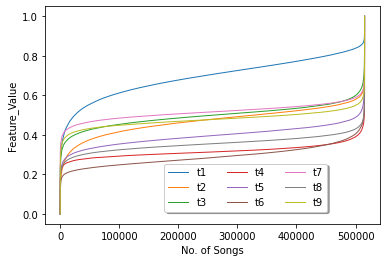

In [16]:
# plotting 10 features and checking how the sorted values are distributed across the songs
for t in T_features[1:10]:
    y_values = X_df[t]
    plt.plot(sorted(y_values), label=t, linewidth=1)
plt.xlabel("No. of Songs")
plt.ylabel("Feature_Value")
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 0.3), ncol=3, fancybox=True, shadow=True)

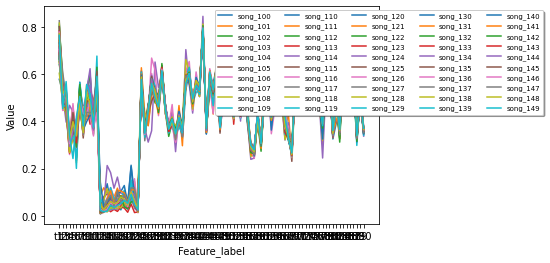

In [17]:
#plotting 50 samples from 100 to 149
for i in range(100, 150):
    plt.plot(X_df.loc[i], label='song_' + str(i))
    
plt.xlabel("Feature_label")
plt.ylabel("Value")
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), ncol=5, fancybox=True, shadow=True, fontsize=7)

From the above data description output and graphs we can see that the values are now scaled between 0 and 1

In [18]:
# Encoding target variable 
Y_min = Y - Y.min()
Y_enc = to_categorical(Y_min, 90)
print("Shape od target before encoding: ", Y.shape)
print("Shape od target after encoding: ", Y_enc.shape)

Shape od target before encoding:  (515345,)
Shape od target after encoding:  (515345, 90)


In [39]:
# Splitting dataset into train and test 
# Training data set
X_train = X[0:463715]
y_train = Y_enc[0:463715]

# Test data set
X_test = X[463715:]
y_test = Y_enc[463715:]
print("Shape of training data set", X_train.shape)
print("Shape of training target dataframe", y_train.shape)
print("Shape of test data set", X_test.shape)
print("Shape of test target dataframe", y_test.shape)

Shape of training data set (463715, 90)
Shape of training target dataframe (463715, 90)
Shape of test data set (51630, 90)
Shape of test target dataframe (51630, 90)


## Dimensionality Reduction PCA

In [40]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(X_train)
pca.n_components_

23

In [41]:
# Applying PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Shape of training data set after applying PCA: ", X_train_pca.shape)
print("Shape of test data set after applying PCA: ", X_test_pca.shape)

Shape of training data set after applying PCA:  (463715, 23)
Shape of test data set after applying PCA:  (51630, 23)


## Training Model

### Neural Network

In [42]:
# Training a sequential model Neural Network
model_nn = Sequential()
model_nn.add(Dense(90, input_shape=(23,)))
model_nn.add(Dense(90, activation='softmax'))
model_nn.add(Dense(90))
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)
h = model_nn.fit(
    X_train_pca,
    y_train,
    batch_size=128,
    epochs=20,
    verbose=0,
    validation_data=(X_test_pca, y_test),
    callbacks = [learning_rate_reduction]
)


Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.


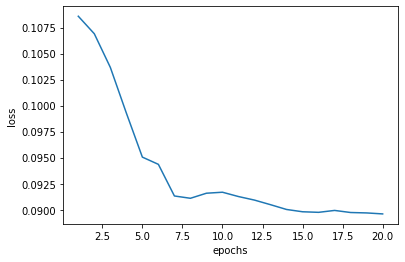

In [46]:
epochs = range(1, len(h.history['loss']) + 1)
plt.plot(epochs, h.history['loss'], label='val');
plt.xlabel('epochs');
plt.ylabel('loss');
plt.show();

In [47]:
model_nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 90)                2160      
                                                                 
 dense_10 (Dense)            (None, 90)                8190      
                                                                 
 dense_11 (Dense)            (None, 90)                8190      
                                                                 
Total params: 18,540
Trainable params: 18,540
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Predicting y variable
y_pred = model_nn.predict(X_test_pca)

1614/1614 [==============================] - 3s 2ms/step


In [53]:
import numpy as np
print("Mean absolute error: ", np.mean(np.absolute((y_pred-np.array(y_test)))))

Mean absolute error:  0.1450523


### Decision tree classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
model_dt = model_dt.fit(X_train,y_train)

In [64]:
#Predict the response for test dataset
y_pred = model_dt.predict(X_test)

In [65]:
print("Mean absolute error: ", np.mean(np.absolute((y_pred-np.array(y_test)))))

Mean absolute error:  0.020964986
